<a href="https://colab.research.google.com/github/Prabhu-shukla/Prabhu-shukla/blob/main/XGBOOS_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from xgboost import XGBClassifier
from xgboost import plot_importance

airlines_data = pd.read_csv('airlines_data.csv')
airlines_data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [15]:
airlines_data.info

<bound method DataFrame.info of         satisfaction      Customer Type  Age   Type of Travel     Class  \
0          satisfied     Loyal Customer   65  Personal Travel       Eco   
1          satisfied     Loyal Customer   47  Personal Travel  Business   
2          satisfied     Loyal Customer   15  Personal Travel       Eco   
3          satisfied     Loyal Customer   60  Personal Travel       Eco   
4          satisfied     Loyal Customer   70  Personal Travel       Eco   
...              ...                ...  ...              ...       ...   
129875     satisfied  disloyal Customer   29  Personal Travel       Eco   
129876  dissatisfied  disloyal Customer   63  Personal Travel  Business   
129877  dissatisfied  disloyal Customer   69  Personal Travel       Eco   
129878  dissatisfied  disloyal Customer   66  Personal Travel       Eco   
129879  dissatisfied  disloyal Customer   38  Personal Travel       Eco   

        Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0                   265             0                                  0   
1                  2464             0                                  0   
2                  2138             0                                  0   
3                   623             0                                  0   
4                   354             0                                  0   
...                 ...           ...                                ...   
129875             1731             5                                  5   
129876             2087             2                                  3   
129877             2320             3                                  0   
129878             2450             3                                  2   
129879             4307             3                                  4   

        Food and drink  Gate location  ...  Online support  \
0                    0              2  ...               2   
1                    0              3  ...               2   
2                    0              3  ...               2   
3                    0              3  ...               3   
4                    0              3  ...               4   
...                ...            ...  ...             ...   
129875               5              3  ...               2   
129876               2              4  ...               1   
129877               3              3  ...               2   
129878               3              2  ...               2   
129879               3              3  ...               3   

        Ease of Online booking  On-board service  Leg room service  \
0                            3                 3                 0   
1                            3                 4                 4   
2                            2                 3                 3   
3                            1                 1                 0   
4                            2                 2                 0   
...                        ...               ...               ...   
129875                       2                 3                 3   
129876                       3                 2                 3   
129877                       4                 4                 3   
129878                       3                 3                 2   
129879                       4                 5                 5   

        Baggage handling  Checkin service  Cleanliness  Online boarding  \
0                      3                5            3                2   
1                      4                2            3                2   
2                      4                4            4                2   
3                      1                4            1                3   
4                      2                4            2                5   
...                  ...              ...          ...              ...   
129875                 4                4  

In [16]:
airlines_data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [20]:
airlines_data.shape

(129880, 22)

In [21]:
# We will do ONE+HOT coding to transform catgorical data into numerical

In [19]:
ailines_data_dummies = pd.get_dummies(airlines_data,columns=['satisfaction','Type of Travel','Class','Customer Type' ] )
ailines_data_dummies.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,satisfaction_dissatisfied,satisfaction_satisfied,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,65,265,0,0,0,2,2,4,2,3,...,0.0,False,True,False,True,False,True,False,True,False
1,47,2464,0,0,0,3,0,2,2,3,...,305.0,False,True,False,True,True,False,False,True,False
2,15,2138,0,0,0,3,2,0,2,2,...,0.0,False,True,False,True,False,True,False,True,False
3,60,623,0,0,0,3,3,4,3,1,...,0.0,False,True,False,True,False,True,False,True,False
4,70,354,0,0,0,3,4,3,4,2,...,0.0,False,True,False,True,False,True,False,True,False


In [22]:
airlines_data.size

2857360

In [23]:
# Defining the Target Variable
X = ailines_data_dummies.drop(['satisfaction_satisfied', 'satisfaction_dissatisfied'], axis=1)
y = ailines_data_dummies['satisfaction_satisfied']

In [24]:
# Splitting the dat into Trining and teat sats

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [26]:
#defining XBboost model

In [27]:
xgb = XGBClassifier(Objective= 'binary: logistic', random_state = 0)

In [30]:
cv_params =  {'max_depth': [4,6],
            'min_child_weight': [3,5],
            'learning_rate': [0.1, 0.2,0.3],
            'n_estimators': [5,10,15],
            'subsample' : [0.7],
            'colsample_bytree': [0.7]}

In [28]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [31]:
xgb_cv = GridSearchCV( xgb,
                      cv_params,
                      scoring = scoring,
                      refit='f1',
                      cv=5,)

In [ ]:
#fitting the Gridsearch model to trining set

In [32]:
xgb_cv = xgb_cv.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "Objective" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "Objective" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "Objective" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "Objective" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "Objective" } are not used.

  warnings.warn

In [33]:
xgb_cv

GridSearchCV(cv=5,
             estimator=XGBClassifier(Objective='binary: logistic',
                                     base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrai...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [34]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 15,
 'subsample': 0.7}

In [35]:
# pickling the trained model

In [36]:
pickle.dump(xgb_cv, open('xgb_cv.pkl', 'wb'))

In [37]:
#applying the model to predict on the test data

In [38]:
y_predict = xgb_cv.predict(x_test)

In [ ]:
# using metrics to asses the model

In [39]:
ac_score = metrics.accuracy_score(y_test, y_predict)
print(ac_score)
precision = metrics.precision_score(y_test, y_predict)
print(precision)
recall = metrics.recall_score(y_test, y_predict)
print(recall)
f1_score = metrics.f1_score(y_test, y_predict)
print(f1_score)

0.9339082229750539
0.9439046435431024
0.9354495577203
0.9396580812057136


In [40]:
#confusion matrix display

In [41]:
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[13615   993]
 [ 1153 16709]]


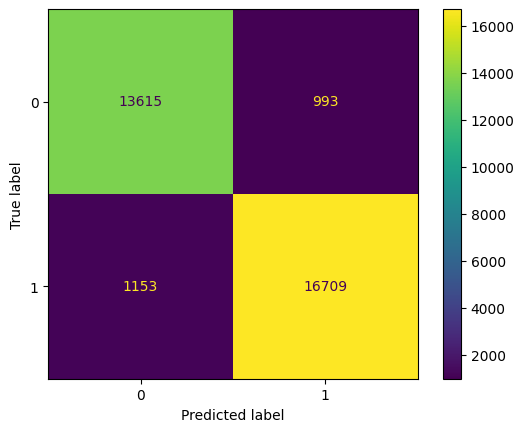

In [42]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)
display.plot()
plt.show()

In [45]:
# the confusion matrix shows that that the performnace of the model is preety
# good . The number of FALSE +ves and FALSE -ves is very low .

In [44]:
# Now we will visialise the most important features
# xgboost has a built in function to visualise the relative mportance of the
# features in the model using matplotlib


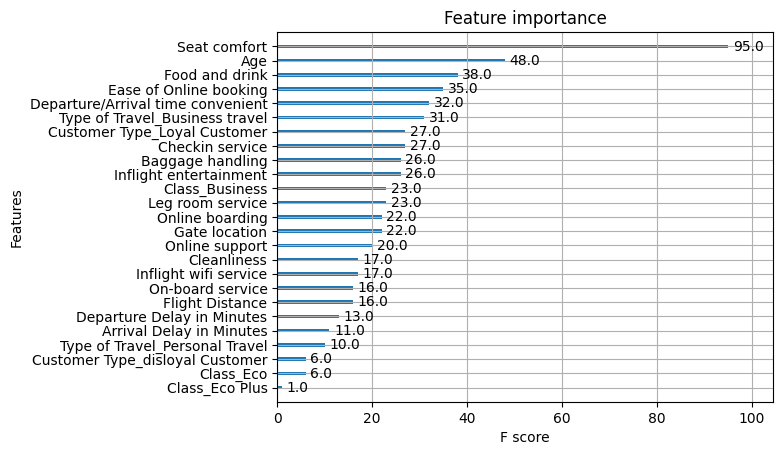

In [49]:
plot_importance(xgb_cv.best_estimator_, height=0.25)
plt.show()

In [50]:
# As we can see that SEAT COMFORT has turned out to be the most important
# feature in predicting the satisfaction level of a pasenger.

In [51]:
# Now lets compare the performance of the various models

In [56]:
Table = pd.DataFrame ({'Model': ['Tuned Random Foret','tuned Decision Tree', 'Tuned XGBoost'],
                       'Precion': [0.950128, 0.955197, precision],
                       'Recall': [0.944501,0.935863,recall],
                       'Accuracy': [0.950128,0.955197, ac_score] ,
                       'F1 score': [0.942450,0.940864,f1_score] })
Table

,Model,Precion,Recall,Accuracy,F1 score
0,Tuned Random Foret,0.950128,0.944501,0.950128,0.942450
1,tuned Decision Tree,0.955197,0.935863,0.955197,0.940864
2,Tuned XGBoost,0.943905,0.935450,0.933908,0.939658
